## Class 2
Model of the galaxy spectrum as a superposition of perfect black body spectra, taking into account dust attenuation:
$$ f_{obs}(\lambda) = f_{intrinsic}(\lambda) 10^{-0.4A_{\lambda}} \quad \quad A_{\lambda} = k(\lambda)E(B-V)$$

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt
from astropy.modeling import models
from astropy import units as u

In [10]:
Mmin = 0.1
Mmax = 100
M=np.linspace(Mmin, Mmax, 10000)

In [11]:
def SPmodel(arrayM, wavelenght, age_gal, BBtot):
    flux_tot = BBtot(wavelenght)
    for mass in arrayM:
        age_mass = mass**(-2.5)*10
        T = mass**(3/8)*(5700)
        N=mass**(-2.35)
        L=mass**(3.5)
        
        if age_gal < age_mass:
            
            BB = models.BlackBody(temperature=T*u.K, scale = 1*u.erg / (u.cm**2 *u.AA *u.s *u.sr))
            flux = N*L*BB(wavelenght)*(1/BB.bolometric_flux.value)
            flux_tot = flux_tot + flux
            
    return flux


wl = np.linspace(1000, 7500, 1000)

BBtotal = models.BlackBody(temperature=1000*u.K, scale = 0*u.erg / (u.cm**2 *u.AA *u.s *u.sr))

In [12]:
def k(wl):
    
    k = np.array([])
    for i in range(np.size(wl)):
        
        if (wl[i] < 0.63):
            k = np.append(k, 2.659*(-2.156 + 1.509/wl[i] - 0.198/(wl[i]**2) +0.011/(wl[i]**3)) + 4.05)
        
        else:
            k = np.append(k, 2.659*(-1.857 + 1.04/wl[i] )+ 4.03)
    return k          

In [13]:
age = 0.1
wl = np.linspace(3500, 7500, 1000)
fluxG3 = SPmodel(M, wl, age, BBtotal)

E = 0.75

A = k(wl*10**(-4)) * E

fluxG3_obs = fluxG3 * np.power(10, -0.4*A) / SPmodel(M, 5500, age, BBtotal)

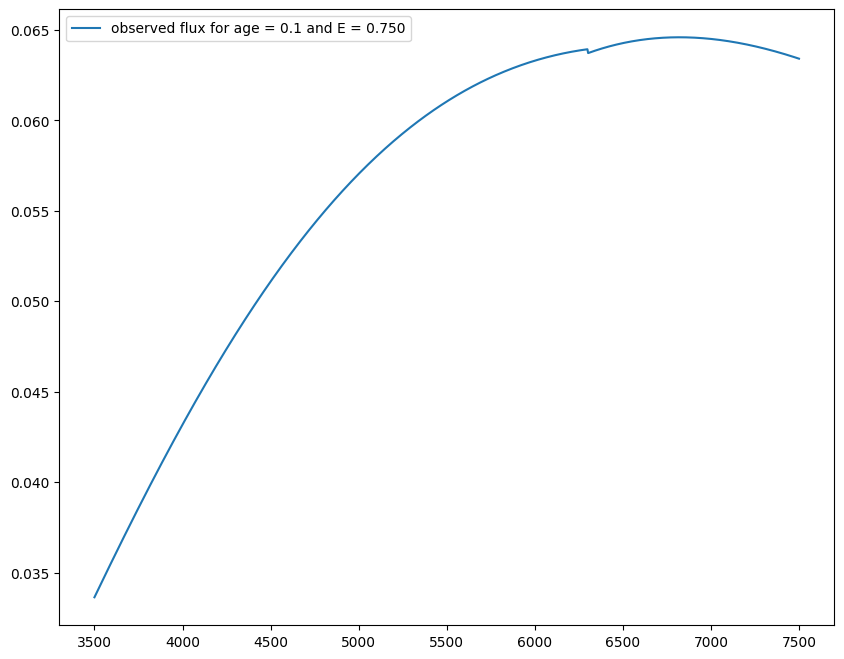

6819.31931931932


In [17]:
plt.figure(figsize=(10,8))
plt.plot(wl, fluxG3_obs, label = 'observed flux for age = %.1f ' %age + 'and E = %.3f' %E)
plt.legend()
plt.xlabel('$\lambda$')
plt.ylabel('$Flux$')
plt.show()

print(wl[np.argmax(fluxG3_obs)])

- age = 5, E = 0.4 -> peak = 6751
- age = 3, E = 0.5 -> peak = 6979
- age = 0.1, E = 0.8 -> peak = 7119

There is degeneracy between the galaxy parameters age and dust. An old galaxy can be mistaken for a young galaxy subjetc to dust attenuation.